In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_excel('futbolVeriNB.xlsx')

In [22]:
data = data.loc[(data['Position'] != 'GK') & (data['Goals'].notna()) & (data['Position'] != 'DF')]

In [23]:
data.loc[:, 'isScored?'] = data['Goals'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
data["Min"] = data["Min"].astype(str).str.replace(',', '', regex=True).astype(int)

In [25]:
X = data.loc[:, ["Position" ,"Min", "xG", "Shots", "ShotsOnTarget", "PrgR", "PrgCarryingDist", "Touches_Att_Pen", "CarriesIntoPenaltyArea", "GCA_Shot"]]
y = data.loc[:, ["isScored?"]]

In [26]:
data[data['isScored?'] == False]

,Player,Nation,Position,Age,MP,Starts,Min,90s,Goals,Asists,...,FoulsDrawn,Offsides,PenaltyKickWon,PenaltyKicksConceded,OwnGoals,RecoveredBalls,AerialsWon,AerialsLost,AerialsWon%,isScored?
14,Désiré Doué,fr FRA,"FW,MF",19-196,12.0,4.0,509,5.7,0.0,2.0,...,15.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,50.0,0
21,Ibrahim Mbaye,fr FRA,"FW,MF",16-327,5.0,1.0,87,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0
25,Ryan Gravenberch,nl NED,MF,22-214,15.0,15.0,1325,14.7,0.0,1.0,...,27.0,0.0,0.0,0.0,0.0,83.0,15.0,2.0,88.2,0
29,Alexis Mac Allister,ar ARG,MF,25-358,14.0,12.0,986,11.0,0.0,0.0,...,14.0,0.0,0.0,0.0,0.0,57.0,8.0,9.0,47.1,0
43,Wataru Endo,jp JPN,MF,31-311,6.0,0.0,23,0.3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,Gerrit Holtmann,ph PHI,"DF,FW",29-266,7.0,4.0,345,3.8,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,21.0,3.0,6.0,33.3,0
2473,Mats Pannewig,de GER,MF,20-049,6.0,1.0,102,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,5.0,37.5,0
2474,Moritz-Broni Kwarteng,gh GHA,"MF,FW",26-232,7.0,0.0,172,1.9,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0
2476,Aliou Badara Baldé,gn GUI,"MF,FW",22-004,5.0,0.0,91,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

In [31]:
import numpy as np

class GaussianNB:
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.theta_ = np.zeros((n_classes, n_features))
        self.var_ = np.zeros((n_classes, n_features))
        self.class_prior_ = np.zeros(n_classes)

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.theta_[i] = np.mean(X_c, axis=0)
            self.var_[i] = np.var(X_c, axis=0) + self.var_smoothing
            self.class_prior_[i] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        log_likelihood = []
        for i in range(len(self.classes_)):
            prior = np.log(self.class_prior_[i])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var_[i]))
            likelihood -= 0.5 * np.sum(((X - self.theta_[i]) ** 2) / self.var_[i], axis=1)
            log_likelihood.append(prior + likelihood)

        return self.classes_[np.argmax(np.array(log_likelihood).T, axis=1)]

In [32]:
classifier = GaussianNB()
import time

startTime = time.time()

classifier.fit(X_train, y_train)

endTime = time.time()

elapsedTime = endTime - startTime
print(f"Gecen sure: {elapsedTime:.6f} saniye")

Gecen sure: 0.001941 saniye


In [33]:
import time

startTime = time.time()

y_pred = classifier.predict(X_test)

endTime = time.time()

elapsedTime = endTime - startTime
print(f"Gecen sure: {elapsedTime:.6f} saniye")

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Gecen sure: 0.001997 saniye
[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]

Accuracy: 0.8118279569892473


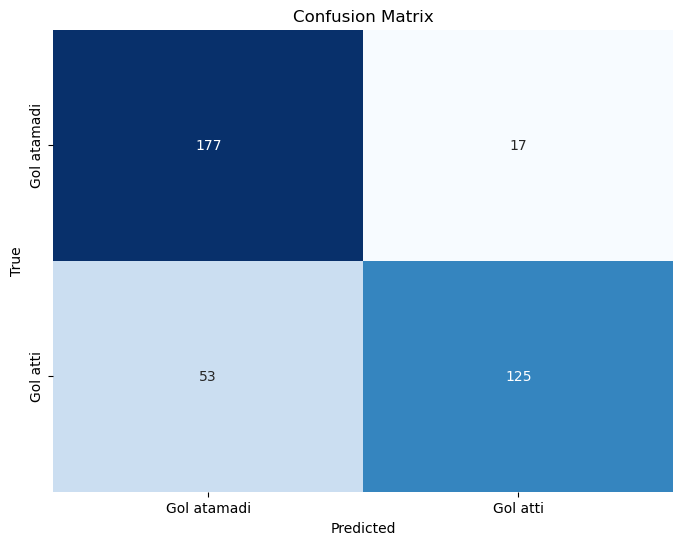

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Gol atamadi', 'Gol atti'], 
            yticklabels=['Gol atamadi', 'Gol atti'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Specificity: {specificity}")
print(f"False Positive Rate: {fpr}")

Precision: 0.8802816901408451
Recall: 0.702247191011236
F1-Score: 0.7812500000000001
Specificity: 0.9123711340206185
False Positive Rate: 0.08762886597938144
